In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/phyto_bloom_window/chlorphyll_data_geesthacht_full.csv'

df = pd.read_csv(path,delimiter=';',quotechar="'")

# convert date to datetime format
# 11.01.2012 with dd.mm.yyyy
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Stromkilometer'] = df['Stromkilometer'].str.replace(',','.')
df['Stromkilometer'] = df['Stromkilometer'].astype(float)
df['Messwert'] = df['Messwert'].str.replace(',','.')
df['Messwert'] = pd.to_numeric(df['Messwert'], errors='coerce')

# seletec pre harborg data from geestacht 575 to 610
df = df[(df['Stromkilometer'] >= 585)] # & (df['Stromkilometer'] <= 610)]
df1 = df.copy()

In [5]:
df['Messstelle'].unique()

array(['Geesthacht (Strom-km 585,9)', 'Zollenspieker (Strom-km 598,7)'],
      dtype=object)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
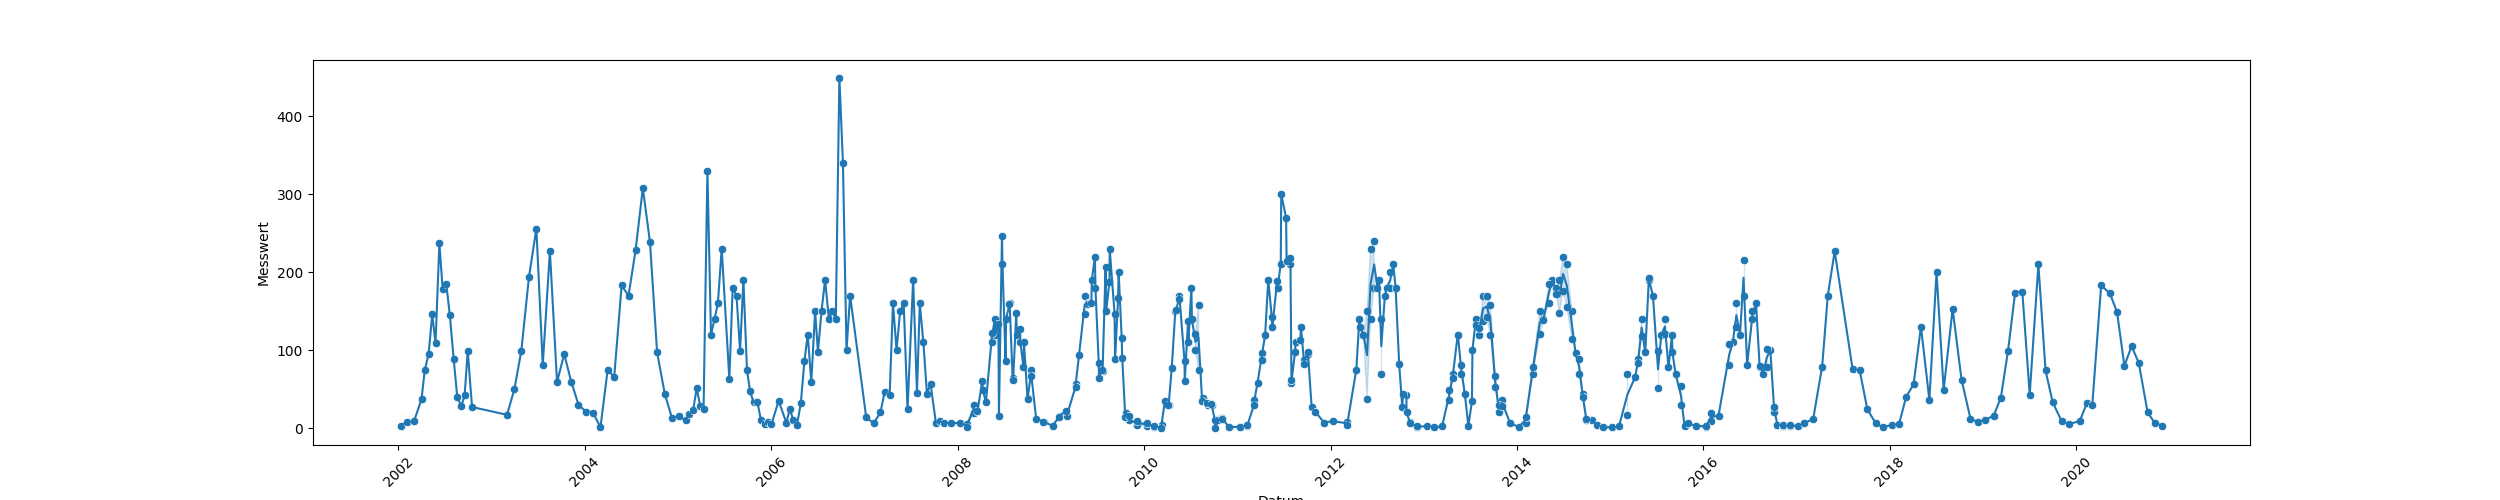

In [20]:
%matplotlib widget

fig,ax = plt.subplots(figsize=(25,5))

# lineplot with marker
sns.scatterplot(data=df, x="Datum", y="Messwert")
sns.lineplot(data=df, x="Datum", y="Messwert", markers=True, dashes=False, ax=ax)

# ticks every month
# _ = ax.xaxis.set_major_locator(plt.MaxNLocator(120))

# rotate xticks
_ = plt.xticks(rotation=45)

In [12]:
path = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/phyto_bloom_window/chlorphyll_data_Lühemündung_full.csv'

df = pd.read_csv(path,delimiter=';',quotechar="'")

# convert date to datetime format
# 11.01.2012 with dd.mm.yyyy
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Stromkilometer'] = df['Stromkilometer'].str.replace(',','.')
df['Stromkilometer'] = df['Stromkilometer'].astype(float)
df['Messwert'] = df['Messwert'].str.replace(',','.')
df['Messwert'] = pd.to_numeric(df['Messwert'], errors='coerce')

# seletec pre harborg data from geestacht 575 to 610
df = df[(df['Stromkilometer'] >= 585)] # & (df['Stromkilometer'] <= 610)]
df2 = df.copy()

In [5]:
df['Messstelle'].unique()

array(['Tonne 117 (Lühemündung) - Strom-km 645,5',
       'Tonne 112 (Lühesand) - Strom-km 650,0'], dtype=object)

In [15]:
df3 = pd.concat([df1,df2])
df3['Messstelle'].unique()

array(['Geesthacht (Strom-km 585,9)', 'Zollenspieker (Strom-km 598,7)',
       'Tonne 117 (Lühemündung) - Strom-km 645,5',
       'Tonne 112 (Lühesand) - Strom-km 650,0'], dtype=object)

In [18]:
df.head()

,Gew?sser,Wasserk?rper,Messstelle,Stromkilometer,Parameter,Messwert,Einheit,Messwerttyp,Erfassungsart,Messwertart,Messvorgang,Datum,Bezugsjahr,Zeit,Datum bis,Zeit bis,Status,Analysemethode,Bemerkung (Datenausgabe),zus?tzliche Informationen
0,Elbe,Elbe-West,"Tonne 117 (Lühemündung) - Strom-km 645,5",645.5,Chlorophyll-A,23.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2010-03-08,NaN,13:13,NaN,NaN,freigegeben,keine Angabe,NaN,NaN
1,Elbe,Elbe-West,"Tonne 117 (Lühemündung) - Strom-km 645,5",645.5,Chlorophyll-A,15.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2010-03-23,NaN,12:00,NaN,NaN,freigegeben,keine Angabe,NaN,NaN
2,Elbe,Elbe-West,"Tonne 117 (Lühemündung) - Strom-km 645,5",645.5,Chlorophyll-A,25.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2010-04-06,NaN,13:44,NaN,NaN,freigegeben,keine Angabe,NaN,NaN
3,Elbe,Elbe-West,"Tonne 117 (Lühemündung) - Strom-km 645,5",645.5,Chlorophyll-A,35.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2010-04-19,NaN,11:50,NaN,NaN,freigegeben,keine Angabe,NaN,NaN
4,Elbe,Elbe-West,"Tonne 117 (Lühemündung) - Strom-km 645,5",645.5,Chlorophyll-A,11.0,µg/l,quantitativ nachgewiesen,Wasser - Gesamtprobe,Einzelprobe,Intervallmessungen,2010-05-05,NaN,13:15,NaN,NaN,freigegeben,keine Angabe,NaN,NaN


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
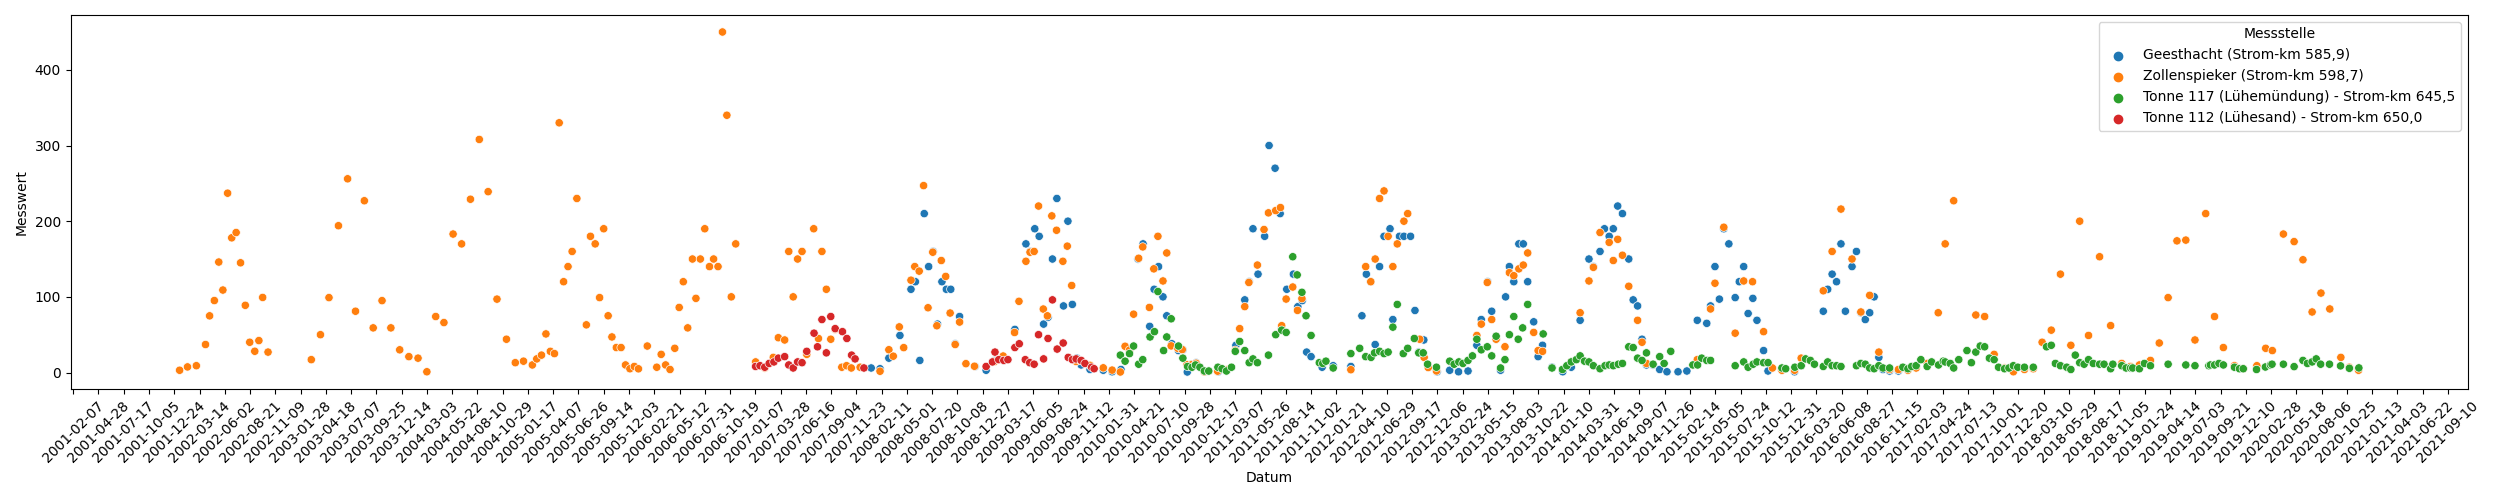

In [27]:
# plot Messwert for each station (Messstelle) in a different color
%matplotlib widget

fig,ax = plt.subplots(figsize=(25,5))

# lineplot with marker
sns.scatterplot(data=df3, x="Datum", y="Messwert", hue='Messstelle')
# sns.lineplot(data=df3, x="Datum", y="Messwert", hue='Messstelle', markers=True, dashes=False, ax=ax)

# ticks every month
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(120))

# rotate xticks
_ = plt.xticks(rotation=45)

plt.tight_layout()
